In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Passengers.csv')
train = df[:324]
test = df[324:]

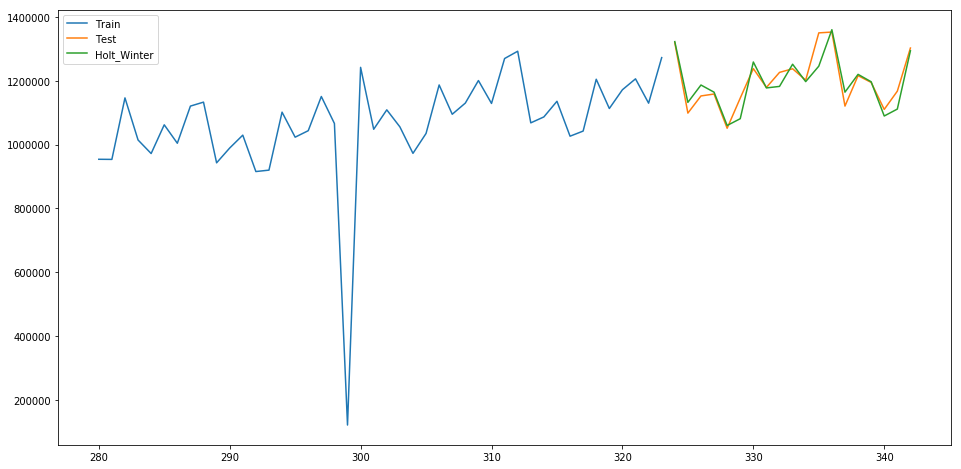

RMS error for Holtz Winter method is :  36756.01006528604
Normalised RMS error for Holtz Winter method is :  0.03059909256772126


In [7]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Total']) ,seasonal_periods=12 ,trend='add', seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Total'][280:], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test.Total, y_hat_avg.Holt_Winter))
print('RMS error for Holtz Winter method is : ',rms)
print('Normalised RMS error for Holtz Winter method is : ',rms/test.Total.mean())

In [8]:
print(y_hat_avg.Holt_Winter)
y_hat_avg.Holt_Winter.to_csv('forecast_Holtz.csv')

324    1.322546e+06
325    1.132353e+06
326    1.186660e+06
327    1.164220e+06
328    1.059951e+06
329    1.081154e+06
330    1.258764e+06
331    1.177554e+06
332    1.182318e+06
333    1.251726e+06
334    1.197327e+06
335    1.245639e+06
336    1.359931e+06
337    1.164286e+06
338    1.220046e+06
339    1.196899e+06
340    1.089634e+06
341    1.111360e+06
342    1.293850e+06
Name: Holt_Winter, dtype: float64


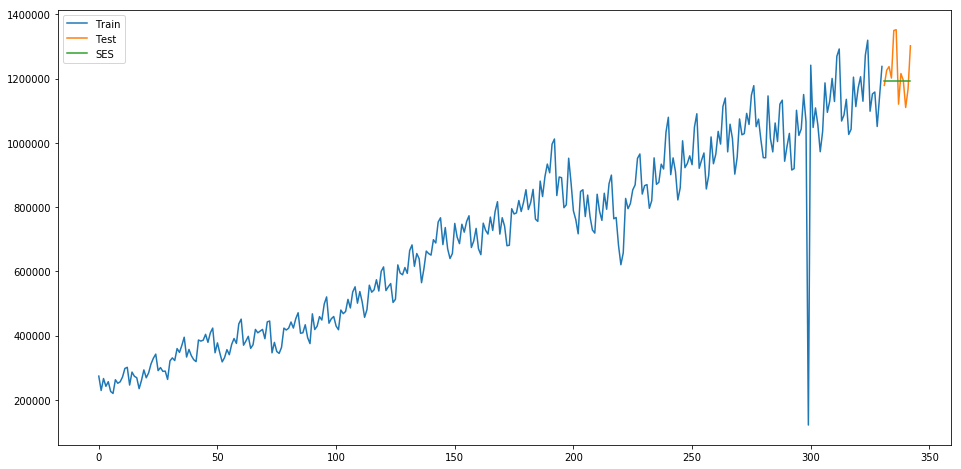

RMS error for Simple Exponential Smoothing method is :  81012.92302246907


In [28]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Total'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test.Total, y_hat_avg.SES))
print('RMS error for Simple Exponential Smoothing method is : ',rms)

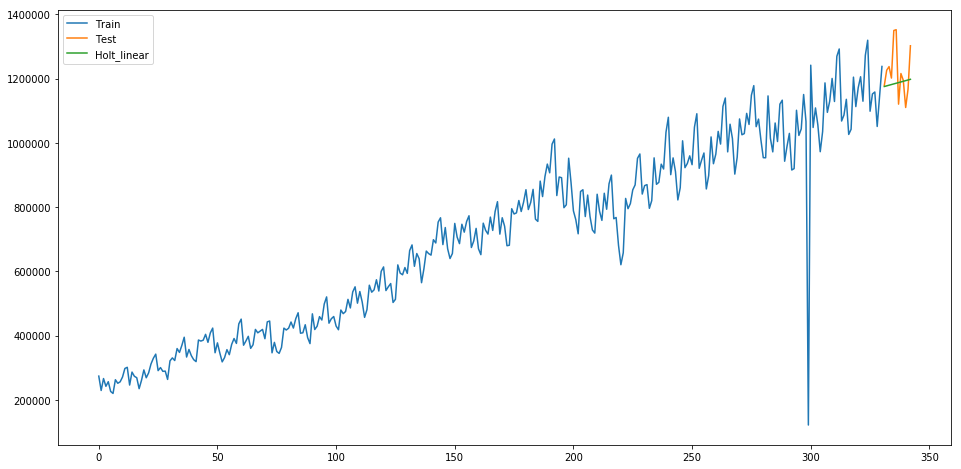

RMS error for Holt_linear method is :  84393.00358150502


In [20]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Total'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(test.Total, y_hat_avg.Holt_linear))
print('RMS error for Holt_linear method is : ',rms)